In [25]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/rise.css">

In [26]:
import tensorflow as tf
import cv2
import time
import copy
import numpy as np
from io import BytesIO
from PIL import Image
import IPython

import posenet

<br><br>
<center><font size="10" color="#efeff0"><b>Jupyter Notebookでプレゼンテーション<br>- 画像処理編 -</b></font></center>
<center><font size="6" color="#efeff0"><b>Python東海/JuliaTokaiミニ合同勉強会　2020/5/30(土)</b></font></center>
<br>

# お前、誰よ？

<table>
    <tr>
        <td><img src="image/fish.gif" alt="Drawing" style="width: 200px;"/></td>
        <td><font size="6">名前　 　：高橋かずひと<br>
            Twitter　：@KzhtTkhs<br>
            お仕事 　：組込、画像処理、IoT、Webアプリなど</font><br>
            <font size="4">その他、個人の活動で、インディーゲーム制作のお手伝をしています。</font>
        </td>
    </tr>
</table>

# 出没先

<center><img src="image/studygroup.png" alt="Drawing" style="width: 800px;"/></center>

# <font size="8" color="#efeff0">画像処理(ディープラーニング、AR、など)で<br>良く遊んでいます。</font>

<center><video width="55%" src="image/movie.mp4" controls/></center>

# 今回のお話

* Jupyter notebookで画像処理のデモをしながら<br>プレゼンするお話です。

　　　※JupyterLabのお話ではありません、、、

# オンラインの画像処理デモの問題点<br>※個人的所感

* 資料に対して「画面共有」を行っているため、他アプリを立ち上げてデモするのは大変
* Youtubeにデモ動画をアップロードして再生すると、<br>Web会議の通信と合わせて通信速度が不安

* ローカルに保存したデモ動画を<br>プレゼンソフト内で再生すれば良いのでは？

　　　→せっかくだから動くところを見せたい（わがまま）

# 実現方法

1. 拡張機能「RISE」を使って、<br>Jupyter notebookをプレゼンツール化する
1. Jupyter notebook上で画像処理をゴリゴリ書く
1. IPython.displayを使って描画する

# 拡張機能「RISE」<br><font size="6" color="#efeff0">https://github.com/damianavila/RISE</font>

<center><img src="image/03.png" alt="Drawing" style="width: 1250px;"/></center>

# Jupyter notebook上で画像処理をゴリゴリ書く

In [20]:
def exec_posenet(cap, sess, model_outputs, output_stride):
    input_image, display_image, output_scale = posenet.read_cap(
        cap,
        scale_factor=0.7125,
        output_stride=output_stride)
    temp_image = copy.deepcopy(display_image)

    heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = sess.run(
        model_outputs, feed_dict={'image:0': input_image})

    pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multi.decode_multiple_poses(
        heatmaps_result.squeeze(axis=0),
        offsets_result.squeeze(axis=0),
        displacement_fwd_result.squeeze(axis=0),
        displacement_bwd_result.squeeze(axis=0),
        output_stride=output_stride,
        max_pose_detections=10,
        min_pose_score=0.15)

    keypoint_coords *= output_scale

    return draw_posenet(temp_image, pose_scores, keypoint_scores, keypoint_coords)

# IPython.displayを使って描画する

In [21]:
def draw_posenet(display_image, pose_scores, keypoint_scores, keypoint_coords):
    overlay_image = posenet.draw_skel_and_kp2(
        display_image,
        pose_scores,
        keypoint_scores,
        keypoint_coords,
        min_pose_score=0.15,
        min_part_score=0.1)
    overlay_image = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB)
    return array_to_image(overlay_image)

In [22]:
def array_to_image(a, fmt='jpeg'):
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

In [23]:
def play_demo(camera=0, play_time=5):
    notebook_display = IPython.display.display("", display_id=1)

    cap = cv2.VideoCapture(camera)
    cap.set(3, 640), cap.set(4, 360)

    sess = tf.Session()
    model_cfg, model_outputs = posenet.load_model(101, sess)

    start_time = time.time()
    while True:
        display_image = exec_posenet(cap, sess, model_outputs, model_cfg['output_stride'])
        notebook_display.update(display_image)
        if (time.time() - start_time) > play_time:
            break
    cap.release()

# デモ

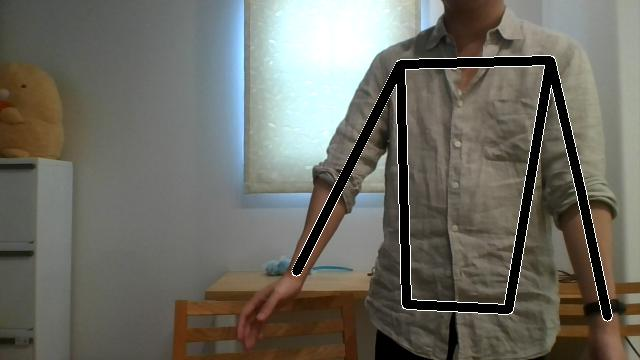

In [30]:
play_demo(camera=0, play_time=15)

<center><font size="12" color="#efeff0"><b>ご清聴ありがとうございました🙃</b></font></center>